In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import os, sys
import toml
import argparse
from munch import Munch, munchify
from typing import Dict, List
import pandas as pd
import json
import numpy as np
from torchvision import datasets, transforms
from collections import defaultdict
from tqdm import trange

In [2]:
PROJ_DIR = os.path.expanduser("~/GitWS/Transmisstion-Phase")
DATA_DIR = os.path.join(PROJ_DIR, "data")
RESULTS_DIR = os.path.join(PROJ_DIR, "results")

In [3]:
sys.path.append(PROJ_DIR)

In [4]:
NUM_CLS = 10
NUM_SAMPLE = 20
NUM_TO_PLOT = 5
MODE = ['original', 'easy', 'mid', 'hard']
BENCHMARK = 'CIFAR10' # 'MNIST'

In [5]:
datasets = {}
for mode in MODE:
    f_path = os.path.join(DATA_DIR, BENCHMARK, mode, f"{NUM_SAMPLE}.npy")
    datasets[mode] = np.load(f_path, allow_pickle=True)

### plot the original image in one figure

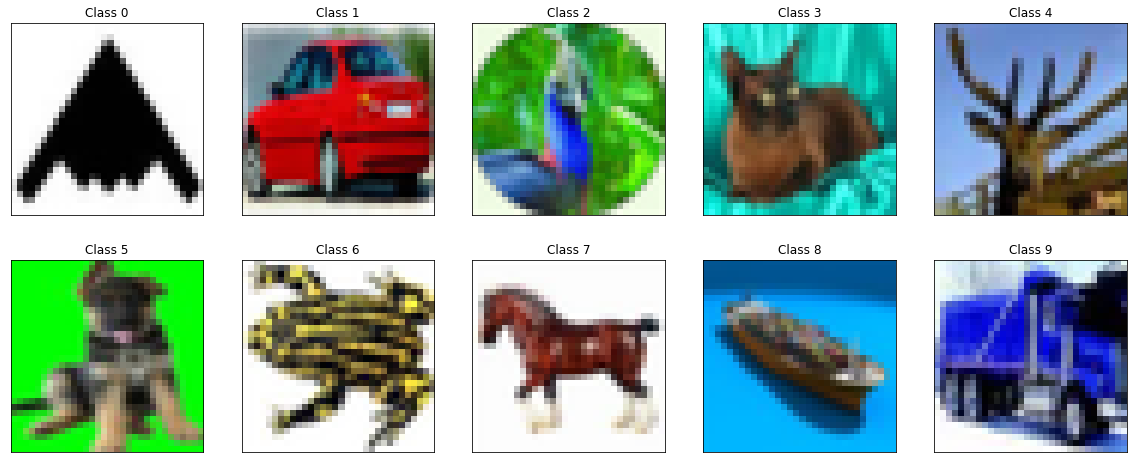

In [6]:
plt.figure(figsize=(20,8))
for i in range(NUM_CLS):
    plt.subplot(2, NUM_CLS//2, i+1)
    if BENCHMARK == 'MNIST':
        plt.imshow(datasets['original'][0][i+1].reshape(28,28), cmap="gray")
    else:
        plt.imshow(
            datasets['original'][0][i+1].reshape(3, 32, 32).transpose(1,2,0)
        )
    plt.title(f"Class {i}")
    plt.xticks([])
    plt.yticks([])

In [7]:
def plot_a_mode(mode=str):
    plt.figure(figsize=(25,50))
    for i in range(NUM_CLS):
        for j in range(1 + NUM_TO_PLOT):
            plt.subplot(NUM_CLS, NUM_TO_PLOT+1, i*(NUM_TO_PLOT+1)+j+1)
            if j == 0:
                _key = 'original'
                _idx = i+1
            else:
                _key = mode
                _idx = i * (NUM_SAMPLE+1) + j + 1
            #print(f"true class: {i}, sample class {datasets[_key][1][_idx-1]}")
            if BENCHMARK == 'MNIST':
                plt.imshow(
                    datasets[_key][0][_idx].reshape(28,28), cmap="gray"
                )
            else:
                plt.imshow(
                    datasets[_key][0][_idx].reshape(
                        3, 32, 32
                    ).transpose(1,2,0)
                )
            plt.xticks([])
            plt.yticks([])
    plt.show()

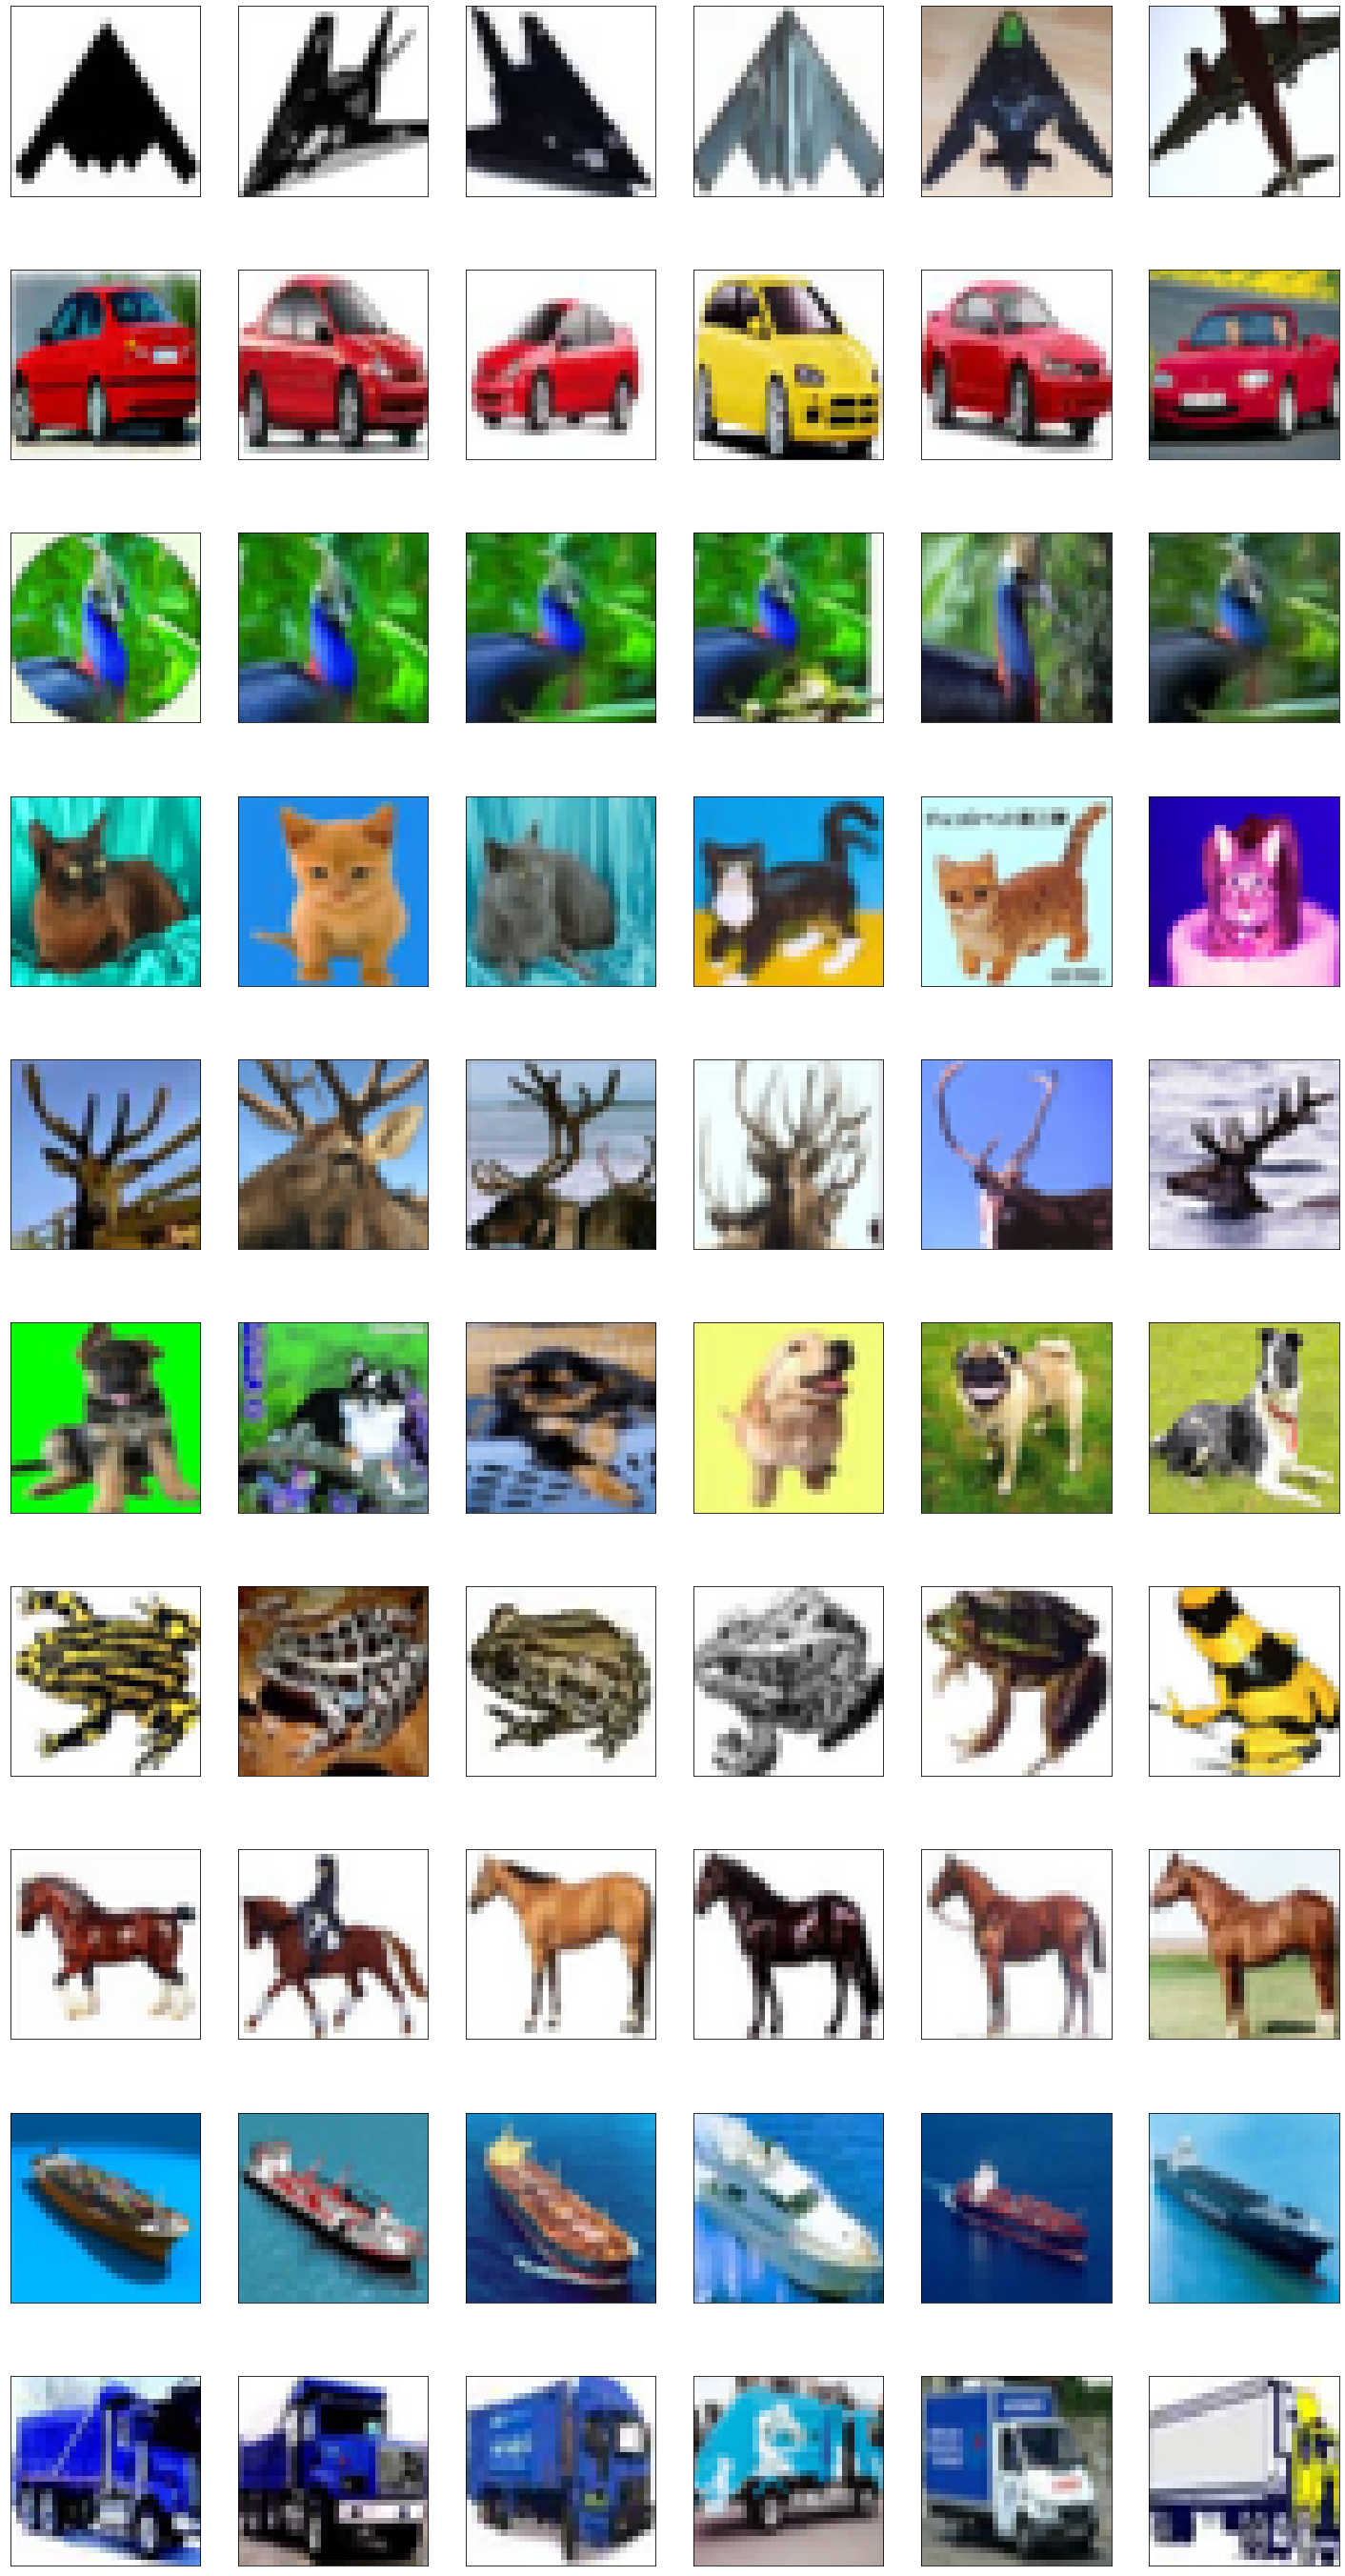

In [8]:
plot_a_mode('easy')

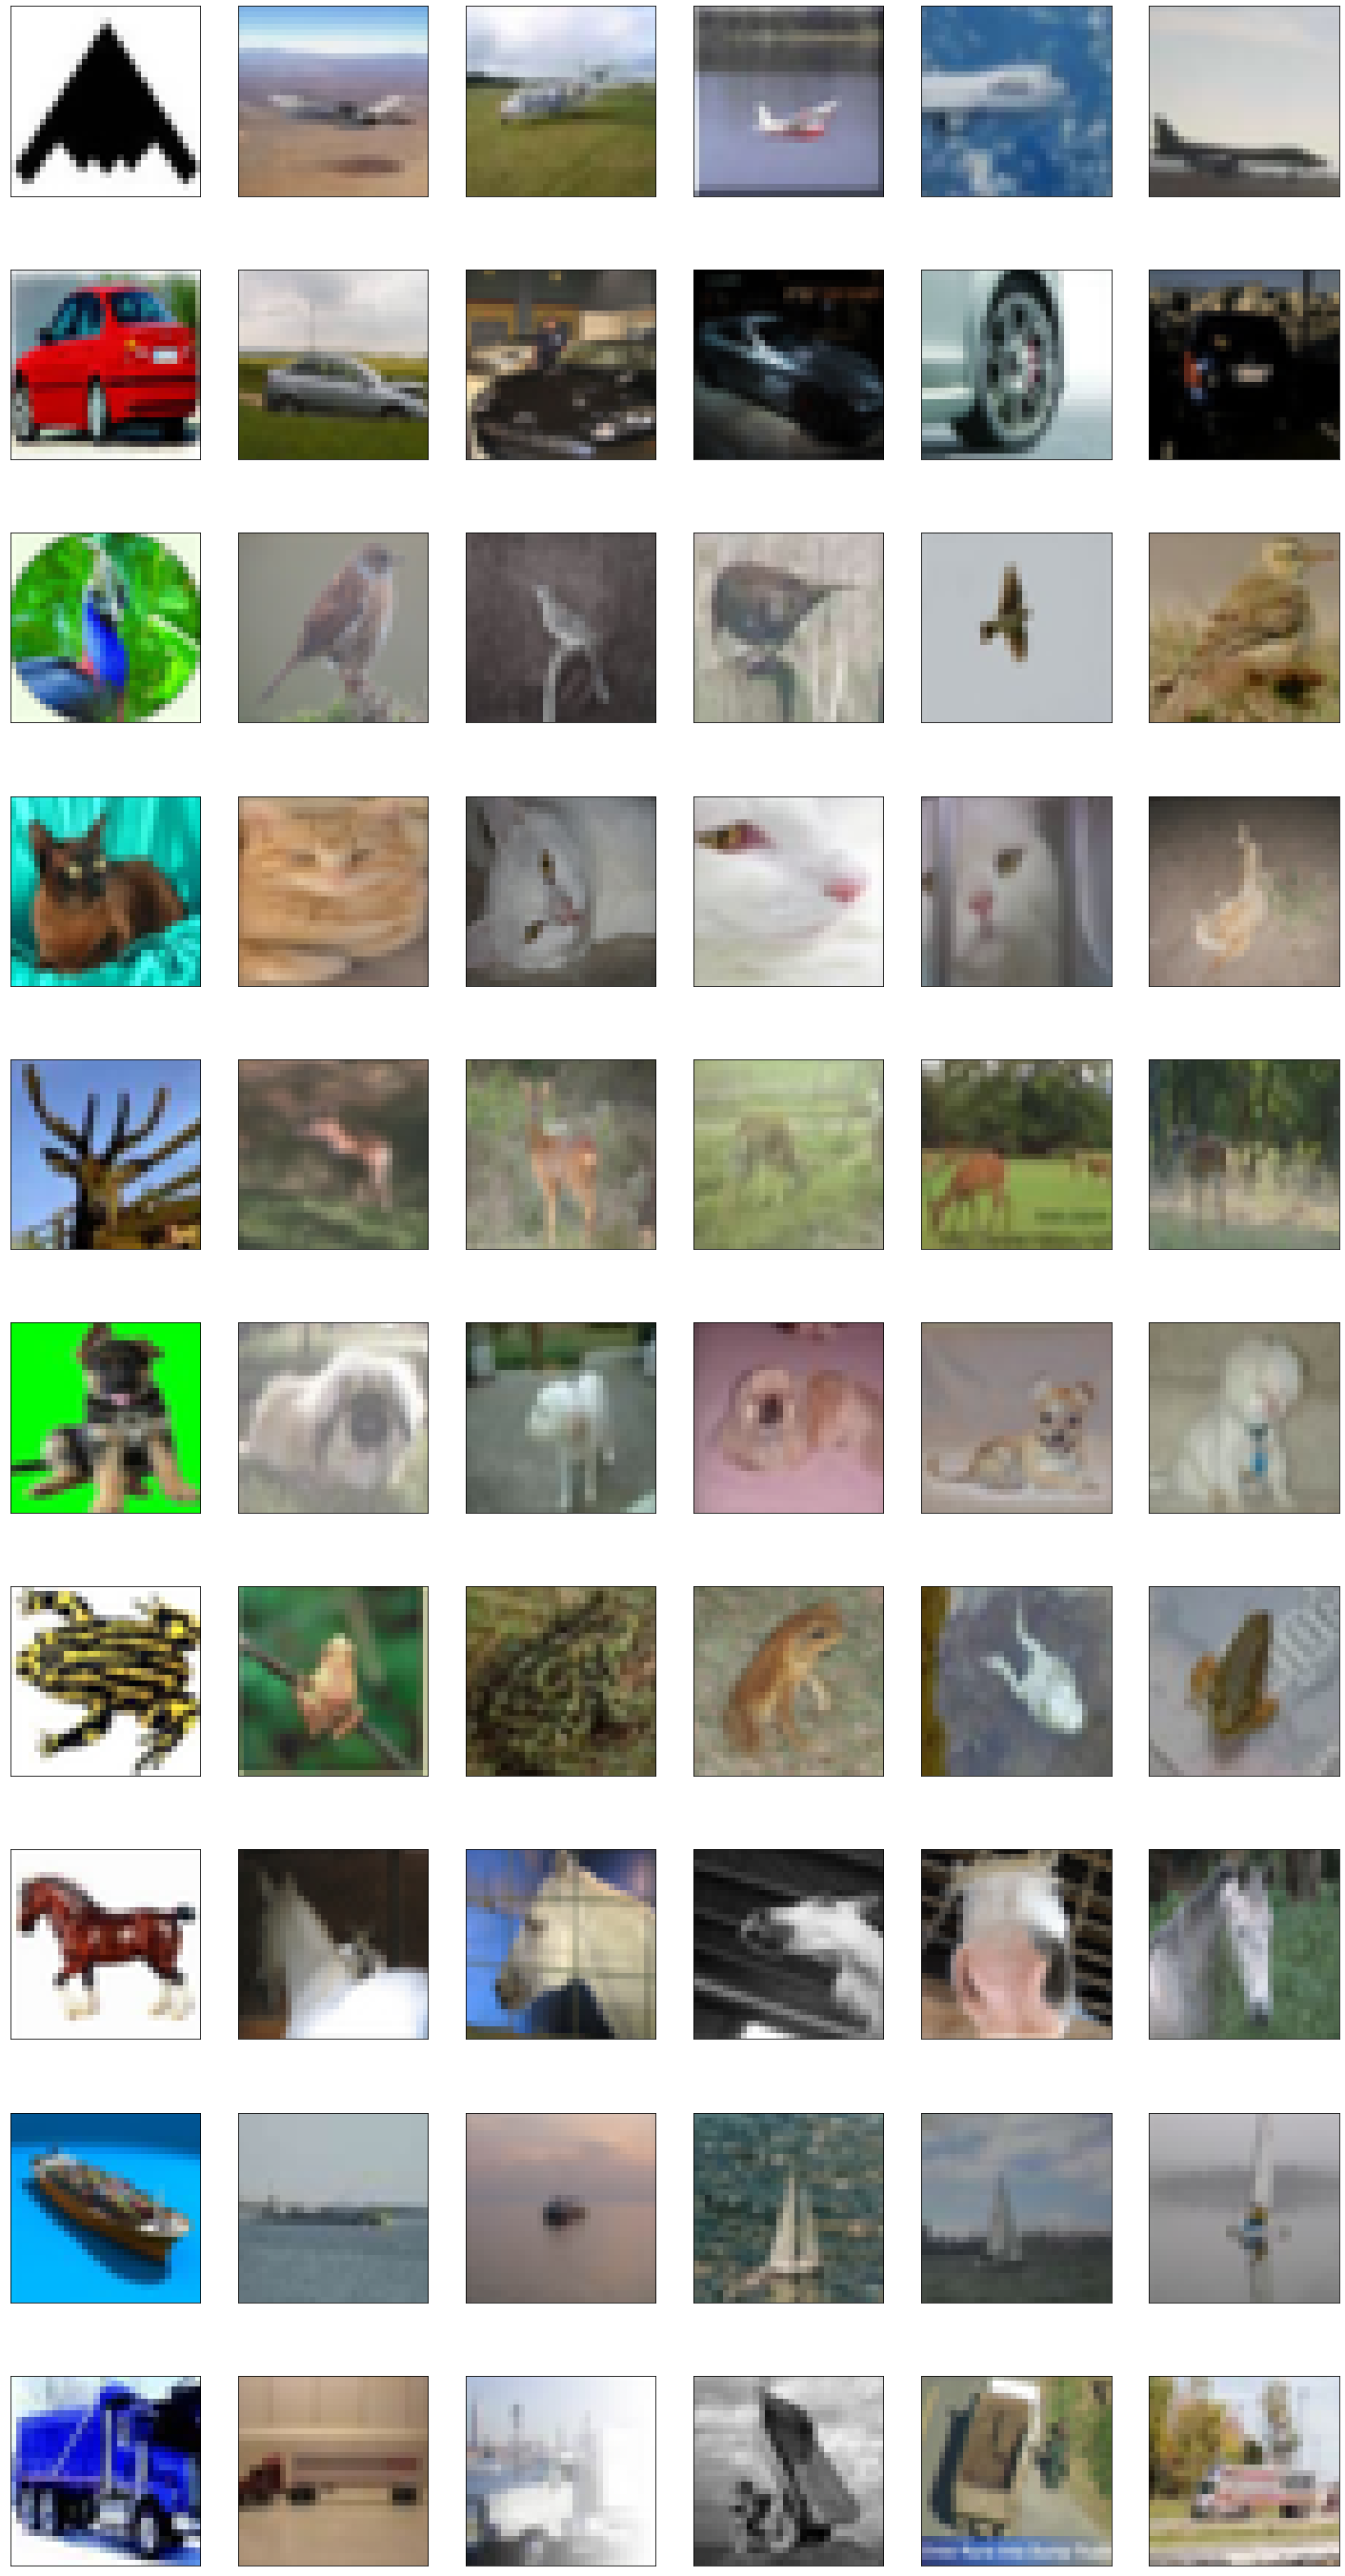

In [9]:
plot_a_mode('mid')

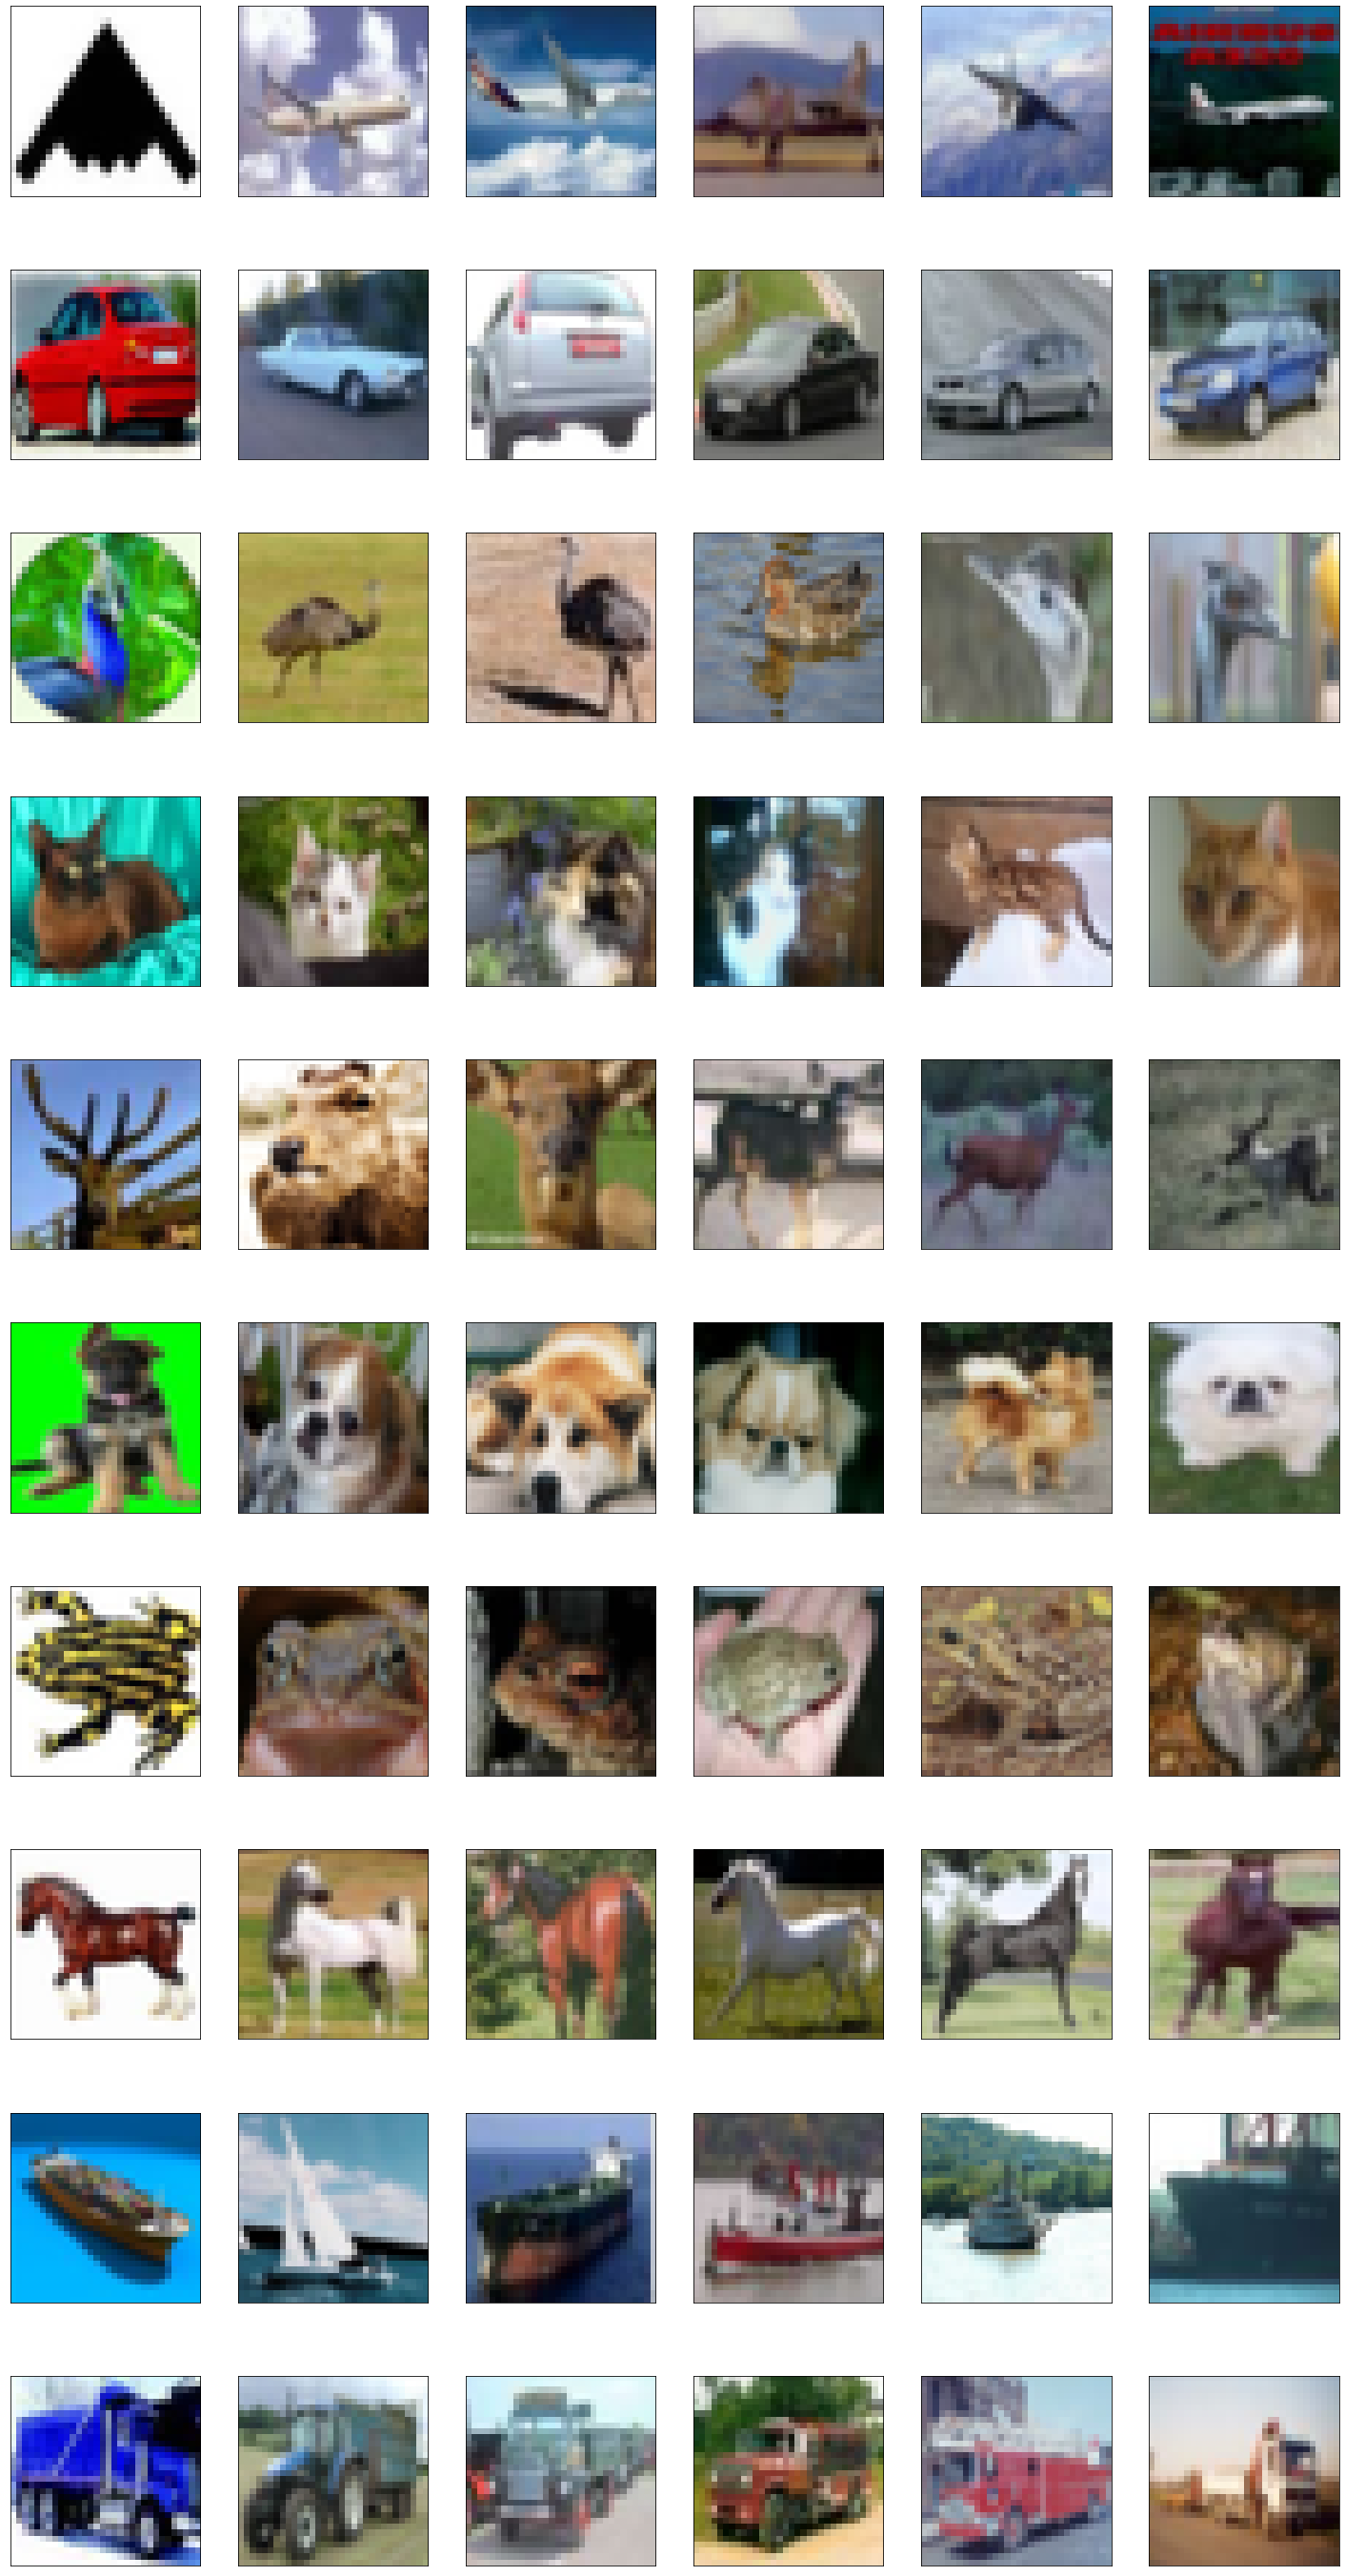

In [10]:
plot_a_mode('hard')